In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
import psycopg2
import s3fs
import csv
import datetime as dt
from dotenv import load_dotenv
from psycopg2.extras import RealDictCursor
from psycopg2.extensions import connection


To do list
- Create visualisations from short term data
- Neated up the notebook
- Output the notebook as a dict

In [ ]:
# connect to database
# extract relevant tables, use a join to gather all information
# Visualise some stuff

In [5]:
load_dotenv()

True

In [10]:
def get_db_connection() -> connection:
    """Connects to the database"""
    try:
        conn = psycopg2.connect(
            user=os.environ["DB_USER"],
            host=os.environ["DB_HOST"],
            database=os.environ["DB_NAME"],
            password=os.environ['DB_PASSWORD'],
            port=os.environ['DB_PORT']
        )
        return conn
    except Exception as err:
        print(err)
        print("Error connecting to database.")
conn = get_db_connection()


In [ ]:
def get_track_popularity(conn, track_name):
    query = """SELECT t.track_name, tp.created_at, tp.popularity_score
    FROM track AS t
    JOIN track_popularity AS tp ON t.track_spotify_id = tp.track_spotify_id
    WHERE t.track_name = %s
    ORDER BY tp.created_at;"""
    with conn.cursor(cursor_factory=RealDictCursor) as cur:
        cur.execute(query,(track_name,))


In [18]:
def get_average_attributes(conn: connection, in_spotify: bool, in_tiktok: bool) -> pd.DataFrame:
    query = """SELECT AVG(track_danceability) AS avg_danceability,
                AVG(track_energy) AS avg_energy,
                AVG(track_valence) AS avg_valence,
                AVG(track_tempo) AS avg_tempo,
                AVG(track_speechiness) AS avg_speechiness
                FROM track
                WHERE in_spotify = %s AND in_tiktok = %s"""
    with conn.cursor(cursor_factory=RealDictCursor) as cur:
        cur.execute(query, (in_spotify, in_tiktok))
        df = pd.DataFrame(cur.fetchall())
    return df


In [28]:
df_spotify = get_average_attributes(conn, in_spotify=True, in_tiktok=False)


df_both = get_average_attributes(conn, in_spotify=True, in_tiktok=True)


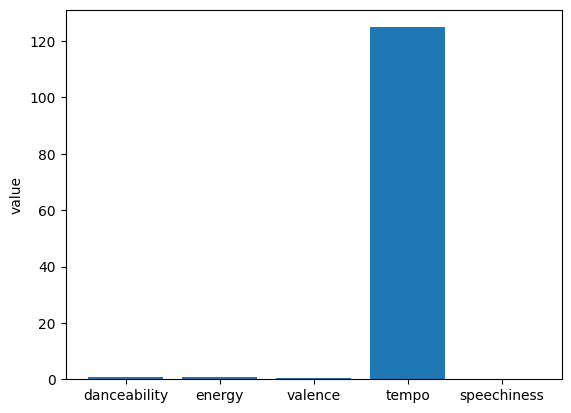

In [40]:
attributes = ['danceability', 'energy', 'valence', 'tempo', 'speechiness']
averages = df_spotify.iloc[0].values.tolist()
plt.bar(attributes, averages)
plt.ylabel('value')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

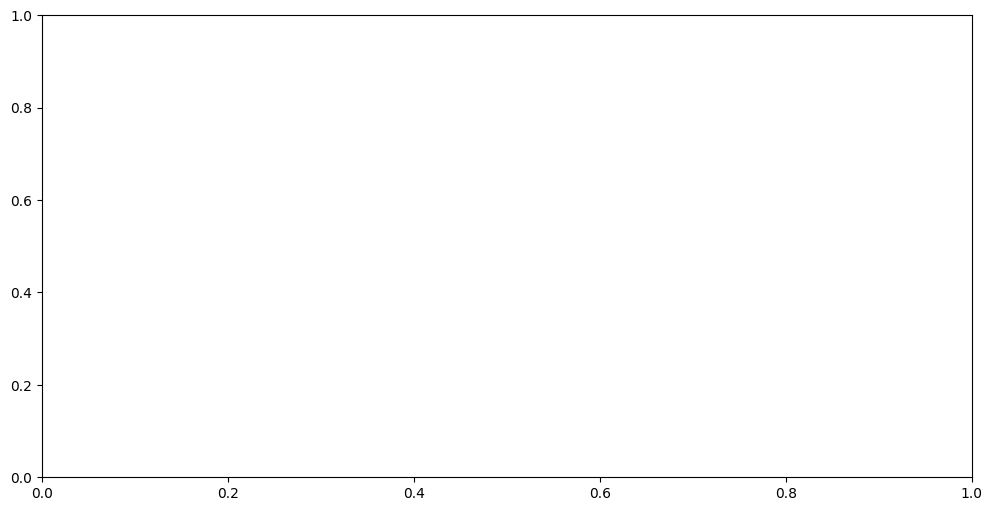

In [41]:
sns.barplot(df_spotify)
sns.barplot(df_both)


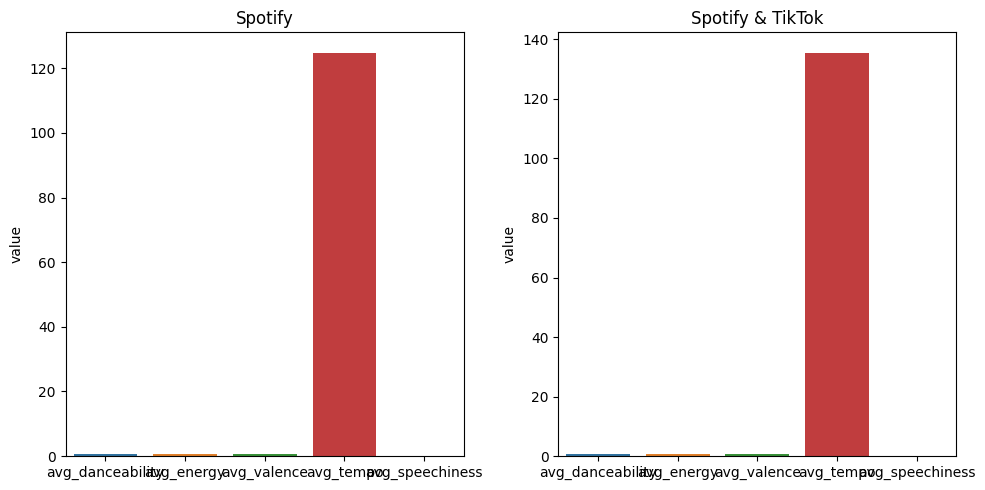

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


def get_average_attributes(conn, in_spotify, in_tiktok):
    query = """SELECT AVG(track_danceability) AS avg_danceability,
                AVG(track_energy) AS avg_energy,
                AVG(track_valence) AS avg_valence,
                AVG(track_tempo) AS avg_tempo,
                AVG(track_speechiness) AS avg_speechiness
                FROM track
                WHERE in_spotify = %s AND in_tiktok = %s"""
    with conn.cursor(cursor_factory=RealDictCursor) as cur:
        cur.execute(query, (in_spotify, in_tiktok))
        df = pd.DataFrame(cur.fetchall())
    return df


# Fetch the average attributes for tracks only in Spotify
df_spotify = get_average_attributes(conn, in_spotify=True, in_tiktok=False)

# Fetch the average attributes for tracks in both TikTok and Spotify
df_both = get_average_attributes(conn, in_spotify=True, in_tiktok=True)

# Set up the bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the attributes for tracks only in Spotify
sns.barplot(data=df_spotify, ax=axes[0])
axes[0].set_title('Spotify')
axes[0].set_ylabel('value')

# Plot the attributes for tracks in both TikTok and Spotify
sns.barplot(data=df_both, ax=axes[1])
axes[1].set_title('Spotify & TikTok')
axes[1].set_ylabel('value')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


TypeError: object of type 'int' has no len()

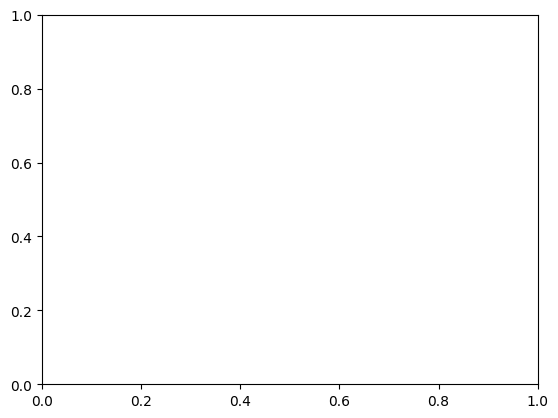

In [47]:
table_ = {"new_artists":[1,2,3,4,5],
         "new_tracks":[6,7,8,9,10]}

fig, ax = plt.subplots()
ax.table(cellText=[1, 2, 3, 4, 5], colLabels="new_artists", loc='centre')

